# Обработка изображений. Сопоставление фотографий Прокудина-Горского

In [1]:
%matplotlib inline

In [12]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_ubyte
import numpy as np
from math import ceil

def colorify(img):
    img = img_as_float(img)
    height = img.shape[0] // 3

    b = img[:height, ::].copy()
    border_height = ceil(b.shape[0] *  (1 - 0.9))
    border_width =  ceil(b.shape[1] *  (1 - 0.9))
    b = b[border_height:b.shape[0] - border_height, border_width: b.shape[1] - border_width]
    
    r = img[height:height * 2, ::].copy()
    border_height = ceil(r.shape[0] *  (1 - 0.9))
    border_width =  ceil(r.shape[1] *  (1 - 0.9))
    r = r[border_height:r.shape[0] - border_height, border_width: r.shape[1] - border_width]
    
    g = img[height * 2:height * 3, ::].copy()
    border_height = ceil(g.shape[0] *  (1 - 0.9))
    border_width =  ceil(g.shape[1] *  (1 - 0.9))
    g = g[border_height:g.shape[0] - border_height, border_width: g.shape[1] - border_width]

    max_blue_corr = -1
    max_red_corr = -1

    x = np.arange(-80, 80)
    y = np.arange(-80, 80)
    
    for dy in y:
        for dx in x:
            db = b.copy()
            db = np.roll(db, dy, axis=0)
            db = np.roll(db, dx, axis=1)
            correlation = (db * g).sum()
            if max_blue_corr < correlation:
                max_blue_corr = correlation
                bdy = dx
                bdx = dy

            dr = r.copy()
            dr = np.roll(dr, dy, axis=0)
            dr = np.roll(dr, dx, axis=1)
            correlation = (dr * g).sum()
            if max_red_corr < correlation:
                max_red_corr = correlation
                rdy = dx
                rdx = dy
                
                
    b = np.roll(b, bdx, axis=0)
    b = np.roll(b, bdy, axis=1)

    r = np.roll(r, rdx, axis = 0)
    r = np.roll(r, rdy, axis = 1)
    
    img_mod = np.dstack((g, r, b))
    return (img_mod)

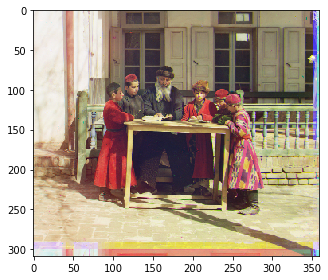

In [13]:
img = imread('people.png')
img = colorify(img.copy())
imshow(img)

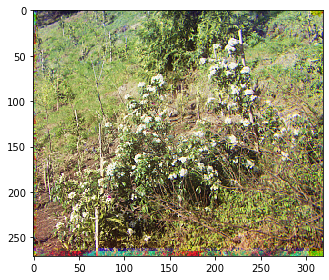

In [14]:
img = imread('flowers.jpg')
img = colorify(img.copy())
imshow(img)

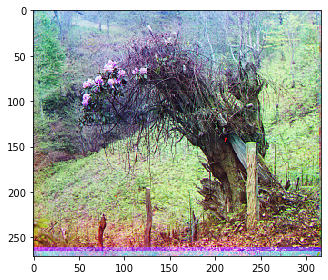

In [18]:
img = imread('grass.jpg')
img = colorify(img.copy())
imshow(img)

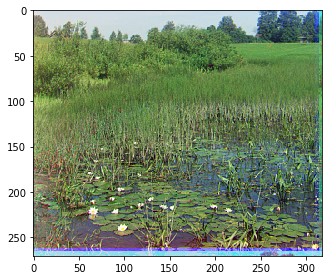

In [16]:
img = imread('field.jpg')
img = colorify(img.copy())
imshow(img)

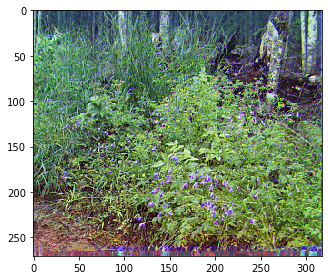

In [17]:
img = imread('forest.jpg')
img = colorify(img.copy())
imshow(img)